# Определение перспективного тарифа для телеком-компании.  

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Первый-взгляд" data-toc-modified-id="Первый-взгляд-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Первый взгляд</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Подготовка-данных." data-toc-modified-id="Подготовка-данных.-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных.</a></span><ul class="toc-item"><li><span><a href="#Изменение-типов-данных" data-toc-modified-id="Изменение-типов-данных-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Изменение типов данных</a></span></li><li><span><a href="#Проверка-на-дубликаты" data-toc-modified-id="Проверка-на-дубликаты-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Проверка на дубликаты</a></span></li><li><span><a href="#Удаление-лишнего-столбца" data-toc-modified-id="Удаление-лишнего-столбца-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Удаление лишнего столбца</a></span></li><li><span><a href="#Сведение-данных" data-toc-modified-id="Сведение-данных-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Сведение данных</a></span><ul class="toc-item"><li><span><a href="#Сведение-данных-об-использовании-связи" data-toc-modified-id="Сведение-данных-об-использовании-связи-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Сведение данных об использовании связи</a></span></li><li><span><a href="#Сведение-данных-о-тарифах" data-toc-modified-id="Сведение-данных-о-тарифах-2.4.2"><span class="toc-item-num">2.4.2&nbsp;&nbsp;</span>Сведение данных о тарифах</a></span></li><li><span><a href="#Вычисление-выручки" data-toc-modified-id="Вычисление-выручки-2.4.3"><span class="toc-item-num">2.4.3&nbsp;&nbsp;</span>Вычисление выручки</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.4.4"><span class="toc-item-num">2.4.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li></ul></li><li><span><a href="#Анализ-данных." data-toc-modified-id="Анализ-данных.-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ данных.</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Проверка-гипотез." data-toc-modified-id="Проверка-гипотез.-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка гипотез.</a></span><ul class="toc-item"><li><span><a href="#Средняя-выручка-пользователей-разных-тарифов-отличается." data-toc-modified-id="Средняя-выручка-пользователей-разных-тарифов-отличается.-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Средняя выручка пользователей разных тарифов отличается.</a></span></li><li><span><a href="#Средняя-выручка-отличается-в-зависимости-от-региона." data-toc-modified-id="Средняя-выручка-отличается-в-зависимости-от-региона.-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Средняя выручка отличается в зависимости от региона.</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод." data-toc-modified-id="Общий-вывод.-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод.</a></span></li></ul></div>

## Первый взгляд

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [1]:
df_users = pd.read_csv("/datasets/users.csv")
df_calls = pd.read_csv("/datasets/calls.csv")
df_messages = pd.read_csv("/datasets/messages.csv")
df_internet = pd.read_csv("/datasets/internet.csv")
df_tariffs = pd.read_csv("/datasets/tariffs.csv")

df_users.info()
df_users

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


In [2]:
df_calls.info()
df_calls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


In [3]:
df_messages.info()
df_messages

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


In [4]:
df_internet.info()
df_internet

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499


In [5]:
df_tariffs.info()
df_tariffs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


### Вывод

В качестве исходных данных мы имеем 5 таблиц: список пользователей, информация о совершённых ими вызовах, отправленных сообщениях и использованном интернете, а так же сведения о тарифах оператора "Мегалайн". В большинстве своём, исходные данные имеют вполне приличный вид - нет лишних пропусков или некоректных типов данных. Однако, в таблице df_internet есть некий столбец "Unnamed: 0", который, судя по всему, повторяет зачения индексов. Судя по исходным данным, этого столбца быть не должно - видимо, он попал к нам случайно.

## Подготовка данных.

### Изменение типов данных 

Хоть в исходных таблицах и нет столбцов с ошибочными типами данных, избежать изменения типов всё равно не удастся - у нас довольно много столбцов с датой и временем. Чтобы с ними можно было спокойно работать в дальнейшем, сейчас потребуется привести их к типу datetime:

In [6]:
def change_type (column):
    val = pd.to_datetime(column, format='%Y-%m-%d')
    return val

df_users['reg_date'] = change_type(df_users['reg_date'])
df_users['churn_date'] = change_type(df_users['churn_date'])
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null datetime64[ns]
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


In [7]:
df_calls['call_date'] = change_type(df_calls['call_date'])
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


In [8]:
df_messages['message_date'] = change_type(df_messages['message_date'])
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


In [9]:
df_internet['session_date'] = change_type(df_internet['session_date'])
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 5.7+ MB


В итоге 5 столбцов с датой в разных таблицах приняли тип datetime. В дальнейшем это позволит удобнее работать с этими данными.

### Проверка на дубликаты

In [10]:
list = [df_users, df_calls, df_messages, df_internet]
for data in list:
    print(data.duplicated().sum())

0
0
0
0


В исходных данных нет ни одного дубликата, ни в одной из таблиц.

### Удаление лишнего столбца 

In [11]:
df_internet['idx'] = df_internet.index
if df_internet['Unnamed: 0'].equals(df_internet['idx']): 
    print('Значения столбца "Unnamed: 0" полностью совпадают с индексами датафрейма.')
else: 
    print('Столбец "Unnamed: 0" нельзя удалять')

Значения столбца "Unnamed: 0" полностью совпадают с индексами датафрейма.


In [12]:
df_internet = df_internet.drop(['Unnamed: 0', 'idx'], axis=1)
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.6+ MB


В таблице df_internet действительно затесался лишний столбец, значения которого полностью повторяли индексы этой же таблицы. Скорее всего, такая ошибка возникла при выгрузке данных, или при разделении на несколько csv файлов. Как бы то ни было, больше этот столбец нам не помешает. 

### Сведение данных 

#### Сведение данных об использовании связи

In [13]:
df_calls['month'] = pd.DatetimeIndex(df_calls['call_date']).month
df_messages['month'] = pd.DatetimeIndex(df_messages['message_date']).month
df_internet['month'] = pd.DatetimeIndex(df_internet['session_date']).month

Для удобства дальнейшей сортировки все номера месяцев были выделены в отдельный столбец 'month', и теперь можно с лёгкостью посчитать, сколько звонков/сообщений/трафика было использовано абонентами. Однако, согласно исходным данным, "Мегалайн" округляет продолжительность вызовов до целых минут, а трафик - до целых гигабайт. Поэтому, прежде чем собирать сводную таблицу по звонкам, сначала необходимо округлить значения столбца 'duration'.

In [14]:
def pivot_function (data, values, aggfunc, columns):
    pivot = data.pivot_table(index=['user_id', 'month'], values=values, aggfunc=aggfunc)
    pivot.columns = columns
    return pivot

df_calls['duration'] = np.ceil(calls['duration']).astype('int')

pivot_calls = pivot_function(df_calls, 'duration', ['count', 'sum'], ['calls_count', 'minutes_sum'])
pivot_calls.head(10)

calls_count  minutes_sum
user_id month                          
1000    5               22          159
        6               43          172
        7               47          340
        8               52          408
        9               58          466
        10              57          350
        11              43          338
        12              46          333
1001    11              59          430
        12              63          414

In [15]:
pivot_messages = pivot_function(df_messages, 'id', 'count', ['messages_count'])
pivot_messages.head(10)

messages_count
user_id month                
1000    5                  22
        6                  60
        7                  75
        8                  81
        9                  57
        10                 73
        11                 58
        12                 70
1002    6                   4
        7                  11

Количество использованного интернет-трафика "Мегалайн" округляет до целых гигабайт, однако не за каждую сессию, а суммарно за месяц. Поэтому в этот раз мы сначала соберём данные в сводную таблицу, а уже после этого произведём округление.

In [16]:
pivot_internet = pivot_function(df_internet, ['mb_used'], 'sum', ['sum_gb_used'])
pivot_internet['sum_gb_used'] = (pivot_internet['sum_gb_used'] / 1024).apply(np.ceil).astype('int')
pivot_internet.head(10)

sum_gb_used
user_id month             
1000    5                3
        6               23
        7               14
        8               14
        9               15
        10              15
        11              15
        12              10
1001    11              18
        12              14

Теперь можно собрать в одну таблицу все интересующие нас показатели по каждому клиенту, с разделением по месяцам:

In [17]:
pivot_total = pivot_calls.join([pivot_messages, pivot_internet], how='outer')
pivot_total.head(10)

calls_count  minutes_sum  messages_count  sum_gb_used
user_id month                                                       
1000    5             22.0        159.0            22.0          3.0
        6             43.0        172.0            60.0         23.0
        7             47.0        340.0            75.0         14.0
        8             52.0        408.0            81.0         14.0
        9             58.0        466.0            57.0         15.0
        10            57.0        350.0            73.0         15.0
        11            43.0        338.0            58.0         15.0
        12            46.0        333.0            70.0         10.0
1001    11            59.0        430.0             NaN         18.0
        12            63.0        414.0             NaN         14.0

In [18]:
pivot_total.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3214 entries, (1000, 5) to (1499, 12)
Data columns (total 4 columns):
calls_count       3174 non-null float64
minutes_sum       3174 non-null float64
messages_count    2717 non-null float64
sum_gb_used       3203 non-null float64
dtypes: float64(4)
memory usage: 113.9 KB


Мы получили таблицу pivot_total, отображающую, сколько звонков, минут, смс и гигабайт было использовано каждым абонентом в каждый месяц.  
  В результате объединения, в столбцах образовались пропущенные значения, поскольку не все клиенты пользуются всеми возможными видами связи. По сути, отсутствие значения в данной ситуации легко можно заменить на 0, ведь "отсутствие смс" и "0 смс" это одно и то же. Заодно приведём значения к типу int, ведь у нас нет дробных чисел:

In [19]:
for column in pivot_total.columns:
    pivot_total[column] = pivot_total[column].fillna(0).astype(int)
    
pivot_total.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3214 entries, (1000, 5) to (1499, 12)
Data columns (total 4 columns):
calls_count       3214 non-null int64
minutes_sum       3214 non-null int64
messages_count    3214 non-null int64
sum_gb_used       3214 non-null int64
dtypes: int64(4)
memory usage: 113.9 KB


#### Сведение данных о тарифах 

Для удобства вычисления требуемых значений, нужна таблица, объединяющая в себе user_id и условия тарифов. Для этого в переменную pivot_user_tariffs сохраним копию таблицы df_user, но оставим в ней только столбцы user_id и tariff:

In [20]:
pivot_user_tariffs = df_users.copy().drop(['age', 
                                           'churn_date', 
                                           'city', 
                                           'first_name', 
                                           'last_name', 
                                           'reg_date'], 
                                          axis=1)
pivot_user_tariffs

,user_id,tariff
0,1000,ultra
1,1001,smart
2,1002,smart
3,1003,ultra
4,1004,ultra
...,...,...
495,1495,ultra
496,1496,smart
497,1497,smart
498,1498,smart


Теперь причешем таблицу df_tariffs. В качестве индекса установим название тарифа, что позволит в дальнейшем легко слепить таблицы вместе, а затем переведём мегабайты в гигабайты, не забыв переименовать соответствующий столбец:

In [21]:
df_tariffs = df_tariffs.set_index('tariff_name')
df_tariffs['mb_per_month_included'] = (df_tariffs['mb_per_month_included'] / 1024).astype(int)
df_tariffs = df_tariffs.rename(columns={'mb_per_month_included':'gb_included'})
df_tariffs

,messages_included,gb_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
tariff_name,,,,,,,
smart,50,15,500,550,200,3,3
ultra,1000,30,3000,1950,150,1,1


Всё готово для объединения таблиц. Соединим таблицы pivot_user_tariffs и df_tariffs, в результате чего на каждого пользователя будет приходиться строка с перечислением условий его тарифа. При этом user_id пользователя сделаем индексом таблицы, что сильно упростит индексацию в дальнейшем:

In [22]:
pivot_user_tariffs = pivot_user_tariffs.join(df_tariffs, on='tariff', how='outer').sort_values(by='user_id')
pivot_user_tariffs = pivot_user_tariffs.set_index('user_id')
pivot_user_tariffs.head(10)

,tariff,messages_included,gb_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
user_id,,,,,,,,
1000,ultra,1000,30,3000,1950,150,1,1
1001,smart,50,15,500,550,200,3,3
1002,smart,50,15,500,550,200,3,3
1003,ultra,1000,30,3000,1950,150,1,1
1004,ultra,1000,30,3000,1950,150,1,1
1005,smart,50,15,500,550,200,3,3
1006,smart,50,15,500,550,200,3,3
1007,smart,50,15,500,550,200,3,3
1008,smart,50,15,500,550,200,3,3


#### Вычисление выручки 

Осталось вычислить, сколько денег принёс компании каждый клиент в каждый месяц. Для каждой строки таблицы рассчитываем три значения: min_overrun, sms_overrun и gb_overrun. Они означают перерасход минут, сообщений и интернет трафика соответственно. В случае, если абонент уложился в лимит, и перерасхода нет, переменная примет значение 0, в противном же случае объём перерасхода сразу умножается на стоимость услуг сверх тарифа. Все три таких значения складываются, затем к ним добавляется абонентская плата, и всё это дружно отправляется в свежий столбец profit, отображающий выручку в рублях за каждого абонента в каждый конкретный месяц. Также в конце допишем, какой клиент к какому тарифу относится, чтобы в дальнейшем проще было получить срез данных по одному из тарифов.  
Номера клиентов перебираются по порядку, поэтому, если вдруг какого-то клиента в этой таблице нет совсем, мы сразу это увидим, благодаря конструкции try-except. 

In [23]:
for i in range(1000, 1500): 
    try:
        query = pivot_total.loc[i]
        month = query.index.get_level_values(0)
        for row in month:
            min_overrun = pivot_total.loc[(i, row), 'minutes_sum'] - pivot_user_tariffs.loc[i, 'minutes_included']
            min_overrun = 0 if min_overrun <= 0 else (min_overrun * pivot_user_tariffs.loc[i, 'rub_per_minute'])
    
            sms_overrun = pivot_total.loc[(i, row), 'messages_count'] - pivot_user_tariffs.loc[i, 'messages_included']
            sms_overrun = 0 if sms_overrun <= 0 else (sms_overrun * pivot_user_tariffs.loc[i, 'rub_per_message'])
    
            gb_overrun = pivot_total.loc[(i, row), 'sum_gb_used'] - pivot_user_tariffs.loc[i, 'gb_included']
            gb_overrun = 0 if gb_overrun <= 0 else (gb_overrun * pivot_user_tariffs.loc[i, 'rub_per_gb'])
    
            pivot_total.loc[(i, row), 'profit'] = (min_overrun + 
                                                   sms_overrun + 
                                                   gb_overrun + 
                                                   pivot_user_tariffs.loc[i, 'rub_monthly_fee'])            
            pivot_total.loc[(i, row), 'tariff']  = pivot_user_tariffs.loc[i, 'tariff']
    except:
        print('Абонент с user_id', i, 'не пользовался никаким видом связи.')

pivot_total.head(15)

Абонент с user_id 1128 не пользовался никаким видом связи.
Абонент с user_id 1371 не пользовался никаким видом связи.


calls_count  minutes_sum  messages_count  sum_gb_used  profit  \
user_id month                                                                  
1000    5               22          159              22            3  1950.0   
        6               43          172              60           23  1950.0   
        7               47          340              75           14  1950.0   
        8               52          408              81           14  1950.0   
        9               58          466              57           15  1950.0   
        10              57          350              73           15  1950.0   
        11              43          338              58           15  1950.0   
        12              46          333              70           10  1950.0   
1001    11              59          430               0           18  1150.0   
        12              63          414               0           14   550.0   
1002    6               15          117               4           11   550.0   
        7               26          214              11           18  1150.0   
        8               42          289              13           20  1550.0   
        9               36          206               4           17   950.0   
        10              33          212              10           14   550.0   

              tariff  
user_id month         
1000    5      ultra  
        6      ultra  
        7      ultra  
        8      ultra  
        9      ultra  
        10     ultra  
        11     ultra  
        12     ultra  
1001    11     smart  
        12     smart  
1002    6      smart  
        7      smart  
        8      smart  
        9      smart  
        10     smart

#### Вывод

Исходные данные были приведены к нормальному виду - удалены лишние столбцы, попавшие по ошибке, исправлены типы данных. Собраны две сводные таблицы, pivot_user_tariffs и pivot_total. В первой на каждый user_id приведён соответствующий ему тариф, вместе со всеми условиями. Во второй таблице теперь находится помесячная информация об использованных минутах/смс/гигибайтах, а также выручке с каждого пользователя и названии его тарифа. Данные готовы к дальнейшему анализу.

## Анализ данных. 

Основная цель этого исследования - определить, какой из тарифов прибыльнее. Значит, полученные в таблице pivot_total данные нужно рассматривать по двум тарифам отдельно друг от друга, и удобнее это будет делать в двух разных таблицах: df_smart и df_ultra. 

In [24]:
df_smart = pivot_total.query('tariff == "smart"')
df_ultra = pivot_total.query('tariff == "ultra"')
print(df_smart['tariff'].value_counts())
print(df_ultra['tariff'].value_counts())

smart    2229
Name: tariff, dtype: int64
ultra    985
Name: tariff, dtype: int64


Стоит отметить, что в нашей выборке абонентов с тарифом smart примерно в 2.25 раз больше, чем с тарифом ultra.  
Теперь можно рассчитать статистики и построить необходимые графики. Создадим для этого отдельную функцию - stat. В качестве аргументов она будет принимает два датасета, целевой и исходный, после чего наполнит первый из них вычисленными значениями среднего, дисперсии и стандартного отклонения для каждого типа связи: 

In [25]:
def stat (data1, data2):
    
    for column in data1.columns:
        
        data1.loc['mean', column] = data2[column].mean()
        data1.loc['var', column] = np.var(data2[column], ddof=1)
        data1.loc['std', column] = np.std(data2[column])
        print('{}:'.format(column))
        data2[column].hist(range=(0, (data2[column].max() + 1)), bins=30)
        plt.show()
    
    data1.columns = ['minutes', 'messages', 'gb', 'profit']

minutes_sum:


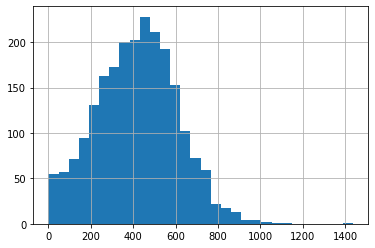

messages_count:


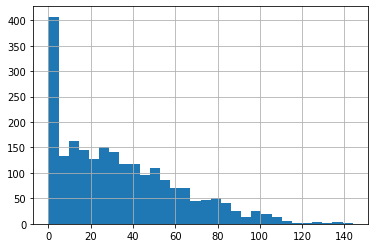

sum_gb_used:


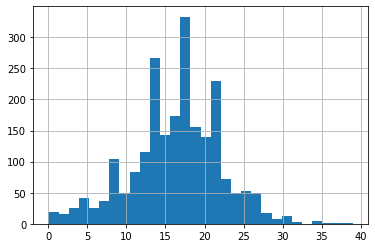

profit:


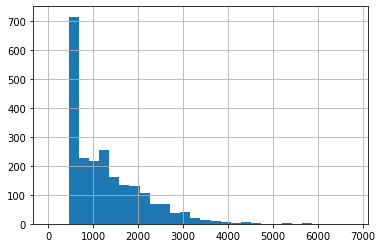

,minutes,messages,gb,profit
mean,417.935,33.384,16.3288,1289.97
var,36219.3,796.813,33.0287,669786
std,190.271,28.2215,5.74577,818.221


In [26]:
statistics_smart = pd.DataFrame(columns=['minutes_sum', 'messages_count', 'sum_gb_used', 'profit'], 
                                index=['mean', 'var', 'std'])
stat(statistics_smart, df_smart)
statistics_smart

В случае с тарифом smart мы получили близкое к нормальному распределение суммарного количества минут и гигабайт, а вот графики количества сообщений и выручки явно положительно скошены. При этом и в случае с выручкой, и в случае с сообщениями видно большое количество значений на минимальном пороге. Это означает, что большое количество людей не пользуется смсками и не вылезает за границы абонентской платы.

minutes_sum:


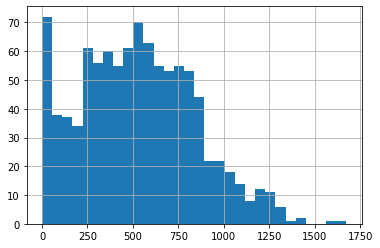

messages_count:


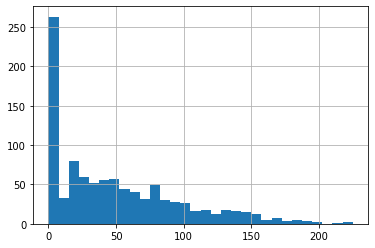

sum_gb_used:


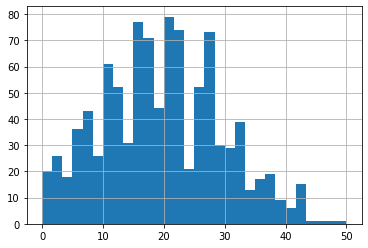

profit:


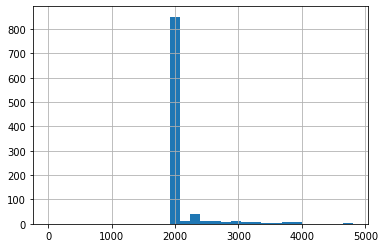

,minutes,messages,gb,profit
mean,526.623,49.3635,19.4944,2070.15
var,100874,2285.27,97.0917,141517
std,317.445,47.7802,9.84851,375.996


In [27]:
statistics_ultra = pd.DataFrame(columns=['minutes_sum', 'messages_count', 'sum_gb_used', 'profit'], 
                                index=['mean', 'var', 'std'])

stat(statistics_ultra, df_ultra)
statistics_ultra

### Вывод 

Статистики тарифа ultra, в целом, похожи на тариф smart, но есть несколько отличий: 
- Количество минут разговора в месяц всё также стремится к нормальному распределению, но здесь более заметна зона около 0 - количество людей, совсем не разговаривавших по телефону, практически такое же, как и количество людей с суммарной продолжительностью в 500 минут разговора. А 500 минут - это почти среднее значение по всем абонентам этого тарифа, поэтому можно сделать вывод, что действительно много людей не использует телефонную связь.  
- График с сообщениями практически польностью повторяет аналогичный для тарифа smart, с поправкой на меньшее количество абонентов.
- Распределение интернет-трафика стремится к нормальному, как и у прошлого тарифа. Объяснением "лохматости" графика может стать небольшое количество пользователей, при большом диапазоне разброса значений.  
- А вот объём выручки практически не отличается от размера абонентской платы, среднее 2070 при абонентской 1950. Видимо, перевалить за включенный в тариф лимит минут/смс/гб довольно сложно.    

Отдельно стоит отметить, что абоненты тарифа ultra, в среднем, тратят больше минут, смс и гб в месяц, чем абоненты тарифа smart, хоть и не сильно.

## Проверка гипотез. 

### Средняя выручка пользователей разных тарифов отличается. 

In [28]:
alpha = 0.05

results = st.ttest_ind(df_smart['profit'], df_ultra['profit'])

print('p-значение', results.pvalue, '\n')

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение 1.4229814360764067e-160 

Отвергаем нулевую гипотезу


Нулевая гипотеза звучит так: "Средние выручки пользователей тарифов smart и ultra равны". Однако, эта гипотеза оказалась совсем неправдоподобной, поскольку p-значение составляет примерно 1.42 * 10^-160. С такой вероятностью различие средних значений в двух выборках произошло случайно - скорее всего, выручка от разных тарифов действительно отличается.

### Средняя выручка отличается в зависимости от региона.

In [29]:
moscow_users = df_users[df_users['city'] == 'Москва']

df_smart_moscow = df_smart[df_smart.index.get_level_values(0).isin( moscow_users['user_id'])]
df_smart_other = df_smart[~df_smart.index.get_level_values(0).isin( moscow_users['user_id'])]

df_ultra_moscow = df_ultra[df_ultra.index.get_level_values(0).isin( moscow_users['user_id'])]
df_ultra_other = df_ultra[~df_ultra.index.get_level_values(0).isin( moscow_users['user_id'])]

Сравнивать выручку в зависимости от региона абонента мы будем отдельно для разных тарифов. Для этого были созданы 4 отдельных среза, сохранённых в переменные df_smart_moscow, df_smart_other, df_ultra_moscow и df_ultra_other.

In [30]:
alpha = 0.05

results = st.ttest_ind(df_smart_moscow['profit'], df_smart_other['profit'], equal_var=False)

print('p-значение', results.pvalue, '\n')

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу для тарифа smart')
else:
    print('Не получилось отвергнуть нулевую гипотезу для тарифа smart')
    
print('\nСреднее значение для абонентов из Москвы:', df_smart_moscow['profit'].mean(),
     '\nСреднее значение для абонентов из других регионов:', df_smart_other['profit'].mean())

p-значение 0.15468343176376667 

Не получилось отвергнуть нулевую гипотезу для тарифа smart

Среднее значение для абонентов из Москвы: 1239.3575129533679 
Среднее значение для абонентов из других регионов: 1300.5746066196418


In [31]:
alpha = 0.05

results = st.ttest_ind(df_ultra_moscow['profit'], df_ultra_other['profit'], equal_var=False)

print('p-значение', results.pvalue, '\n')

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу для тарифа ultra')
else:
    print('Не получилось отвергнуть нулевую гипотезу для тарифа ultra')
    
print('\nСреднее значение для абонентов из Москвы:', df_ultra_moscow['profit'].mean(),
     '\nСреднее значение для абонентов из других регионов:', df_ultra_other['profit'].mean())

p-значение 0.8544997530689904 

Не получилось отвергнуть нулевую гипотезу для тарифа ultra

Среднее значение для абонентов из Москвы: 2074.0 
Среднее значение для абонентов из других регионов: 2069.0131578947367


### Вывод 

Для обоих тарифов нулевая гипотеза говорит о том, что средняя выручка от абонентов из Москвы и из остальных городов одинаковая. 
В обоих случаях средние значения выручки различаются, но вероятность того, что это произошло случайно, слишком высока, поэтому мы не можем отвергнуть ни одну из нулевых гипотез. Но стоит заметить, что p-значения для каждого из тарифов отличаются довольно сильно: вероятность случайного несовпадения средних значений для тарифа ultra почти в 5.5 раз выше аналогичной для тарифа smart. Получается, что выручка тарифа ultra меньше зависит от региона, чем у тарифа smart.

## Общий вывод. 

Исходя из предоставленной выборки клиентов компании "Мегалайн" можно сделать вывод, что, в среднем, больше денег приносят абоненты тарифа "Ультра" - средняя выручка по абонентам этого тарифа в 1.6 раз больше, чем у абонентов тарифа "Смарт". Однако, видимо, к такому же выводу приходят и сами клиенты, поскольку тариф "Смарт" они выбирают в 2.25 раз чаще. Получается, что, хоть выручка с одного пользователя на тарифе "Ультра" и выше, денег компании больше приносят абоненты тарифа "Смарт". Скорее всего, причиной выбора младшего тарифа является слишком большая разница в абонентской плате и лимитах. Большинство людей считает, что они всё равно не потратят 1000 смс и 3000 минут, и не видят смысла платить за такой тариф в 4 раза больше. И они правы - в среднем на тарифе "Ультра" звонят и пишут не на много больше, чем на тарифе "Смарт". Отсюда же вытекает и очень маленькое количество людей, который переплачивают сверх тарифа - не уложиться в такой лимит крайне непросто.  
Скорректировать расходы на рекламный бюджет в пользу увеличения маркетинговых мероприятий для тарифа "Ультра" можно, и, возможно, это действительно увеличит прибыль компании путём роста количества абонентов дорогого тарифа. Однако, такое решение оправдано только если рассматривать компанию "Мегалайн" как монополиста, в отрыве от остального рынка. На практике же имеет место конкуренция, и клиент скорее выберет более удобный для него тариф в другой компании, нежели более дорогой в этой. Возможно, более эффективным решением будет изменить тарифную сетку, добавив больше вариантов. Например, взять тариф "Смарт" и увеличить на нём пакет интернета до 20гб, при этом уменьшив количество минут до 400, а абонентскую плату поднять до 750 рублей в месяц. В итоге, бóльшая часть абонентов такого тарифа перестанет вылезать за пределы пакета интернета, но будет переплачивать за минуты разговора, при этом сам тариф может быть достаточно привлекательным за счёт не очень высокой стоимости.